In [1]:
from keras.models import load_model
import keras.backend as K
from keras.metrics import categorical_accuracy
from keras.losses import categorical_crossentropy as logloss
model_multi = load_model('../checkpoints/inceptionv3_299_amd.hdf5')


Using TensorFlow backend.


In [2]:
import os
base_image_dir = '/root/data_299_299/'
files = ['normal','NPDRI','NPDRII','NPDRIII','PDR','small_drusen','big_drusen','CNV','arter']

i=0
print(files)
test_samples_dr = []

for file in files[:5]:
    sub_path = os.path.join(base_image_dir,file)
    for _ in os.listdir(sub_path)[int(0.75*len(os.listdir(sub_path))):]:
        test_samples_dr.append(_)
    
test_samples_amd = []
for file in files[5:8]:
    sub_path = os.path.join(base_image_dir,file)
    for _ in os.listdir(sub_path)[int(0.75*len(os.listdir(sub_path))):]:
        test_samples_amd.append(_)
    print(len(test_samples_amd))
for file in files[:1]:
    sub_path = os.path.join(base_image_dir,file)
    for _ in os.listdir(sub_path)[int(0.75*len(os.listdir(sub_path))):]:
        test_samples_amd.append(_)
    print(len(test_samples_amd))

['normal', 'NPDRI', 'NPDRII', 'NPDRIII', 'PDR', 'small_drusen', 'big_drusen', 'CNV', 'arter']
2454
2997
4782
5622
6543
2579
3187
5745
8199


In [3]:
from scipy import misc
import numpy as np
from keras.applications.inception_v3 import preprocess_input
import os
import cv2

dic = {
 '0':'normal',
 '1': 'NPDRI',
 '2':'NPDRII',
 '3':'NPDRIII',
 '4':'PDR',
 '5':'small_drusen',
 '6':'big_drusen',
 '7':'CNV',
 '8':'arter'
}
data = []
for i in range(10):
    data.append([])

count_right = [0 for x in range(10)]


In [5]:

progress =0

for img in test_samples_amd:
    orign_img = misc.imread(base_image_dir+'/'+dic[img[0]]+'/'+img)
    test_img = np.expand_dims(orign_img,axis = 0)
    test_img = preprocess_input(np.array(test_img).astype(float))
    predict_2 = model_multi.predict(test_img)
    max_pro = np.max(predict_2)
    if int(img[0]) == 0:
        if np.argmax(predict_2) == int(img[0]):
            data[int(max_pro*10)-1].append(max_pro)
    else:
        if np.argmax(predict_2) == int(img[0])-4:
            data[int(max_pro*10)-1].append(max_pro)

    count_right[int(max_pro*10)-1]+=1
    progress+=1
    if progress%500 == 0:
        print(progress)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.02185214, 0.04370428, 0.2185214 , 0.2185214 , 0.30592996,
        0.37148638, 0.39333852, 0.3277821 , 0.15296498, 0.13111284]),
 array([-2.64545904, -2.18783795, -1.73021686, -1.27259577, -0.81497468,
        -0.35735359,  0.1002675 ,  0.55788859,  1.01550968,  1.47313077,
         1.93075186]),
 <a list of 10 Patch objects>)

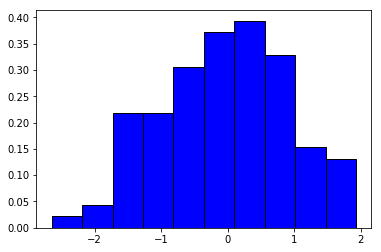

In [9]:
data = np.random.randn(100)
plt.hist(data,bins = 10,normed=1, facecolor = 'blue',edgecolor = 'black',alpha = 1)

In [17]:
print(count_right)
values3 = [0,0.5,0.2989,0.4258,0.4905,0.5331,0.6774,0.7523,0.9609,0]
values5 = [0,0.5,0.3115,0.4428,0.5375,0.5960,0.7017,0.7889,0.9485,0]
count_right_dr = [0,4,87,418,683,771,747,997,2836,0]
new_count_right = [0]+[(count_right_dr[i]*values3[i]+count_right[i]*values5[i])/(count_right_dr[i]+count_right[i]) for i in range(1,9)]+[0]
print(new_count_right)

[0, 2, 61, 341, 785, 906, 962, 1222, 3920, 0]
[0, 0.5, 0.30409324324324327, 0.4334376811594203, 0.5156328337874659, 0.5670817531305904, 0.6910785254534816, 0.7724555655700766, 0.9537052101835405, 0]


0.5
0.3114754098360656
0.44281524926686217
0.5375796178343949
0.5960264900662252
0.7016632016632016
0.7888707037643208
0.948469387755102


<BarContainer object of 10 artists>

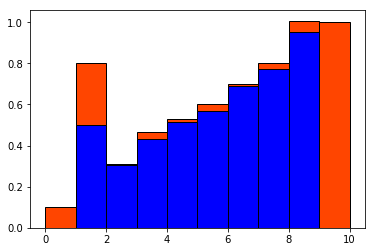

In [18]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(10)
for x in range(1,9):
    print(len(data[x])/count_right[x])
values3 = [0,0.5,0.3115,0.4428,0.5375,0.5960,0.7017,0.7889,0.9485,0]
values4 = [abs(0.1*x-new_count_right[x-1]) for x in range(1,11)]
plt.bar(index,new_count_right,color = 'blue',edgecolor = 'black',align = 'edge',width = 1.0)
plt.bar(index,values4,color = 'orangered',edgecolor = 'black',align = 'edge',bottom = new_count_right,width = 1.0)

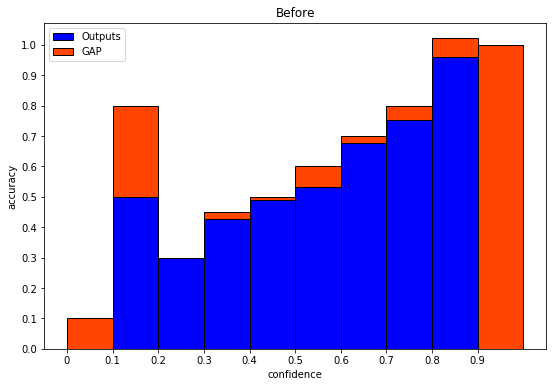

In [5]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(10)
plt.figure(figsize=(9,6))
plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.xticks(index,(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))
plt.yticks(np.arange(0,1.1,0.1))
values3 = [0,0.5,0.2989,0.4258,0.4905,0.5331,0.6774,0.7523,0.9609,0]
values4 = [abs(0.1*x-values3[x-1]) for x in range(1,11)]
plt.title('Before')
plt.bar(index,values3,color = 'blue',edgecolor = 'black',align = 'edge',width = 1.0,label = 'Outputs')
plt.bar(index,values4,color = 'orangered',edgecolor = 'black',align = 'edge',bottom = values3,width = 1.0, label = 'GAP')
plt.legend()
plt.save()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(10)
values = (0,0.1111,0.3448,0.4654,0.5288,0.6172,0.7138,0.8211,0.9395,0)

[0.1, 0.0889, 0.04479999999999995, 0.06539999999999996, 0.028800000000000048, 0.017199999999999882, 0.013799999999999923, 0.021100000000000008, 0.03949999999999998, 1.0]


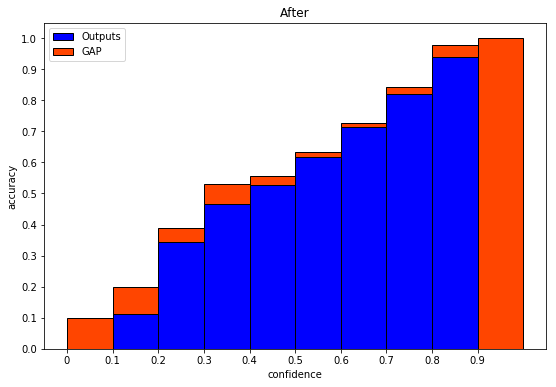

In [15]:
plt.figure(figsize=(9,6))
plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.xticks(index,(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))
plt.yticks(np.arange(0,1.1,0.1))
values2 = [abs(0.1*x-values[x-1]) for x in range(1,11)]
print(values2)
plt.title('After')
plt.bar(index,values,color = 'blue',edgecolor = 'black',align = 'edge',width = 1.0,label = 'Outputs')
plt.bar(index,values2,color = 'orangered',edgecolor = 'black',align = 'edge',bottom = values,width = 1.0,label = 'GAP')
plt.legend()